In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
# function for t score
def t_score(n, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

## Understanding the Hypothesis Testing

Step 1:

Alternate Hypothesis (Bold claim): $ H_1 \Rightarrow  &gt;,  &lt;, \neq  $

Null Hypothesis (Status Quo): $ H_0 \Rightarrow \leq, \geq, = $

Step 2:

Collect a sample of size n
Compute the mean from this sample $ \bar{x} $
Step 3: Compute Test Statistic:

If population variance is unknown $ t = \frac{\bar{x} - \mu}{s/ \sqrt[2]{n}} $

Step 4:

Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis. Let $ \alpha $ be 0.05


Step - 5.1: Apply decision rule:

If test statistic is z-score -

Two tailed z-test:

Right tailed z-test:

Left tailed z-test:

If test statistic is t-score

Two tailed t-test:

Right tailed t-test:

Left tailed t-test:

Step - 5.2: Compute p-value $ P(Test Statistics | H_0) $

For two tailed test:

For one tailed test:

Now, $ if (p value \lt \alpha) \Rightarrow Accept  H_1  or  Reject  H_0 $

### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 

In [3]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500

In [4]:
l1 = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(l1)/len(l1)

465.3

In [5]:
df = len(l1) - 1
df

9

In [6]:
total = 0
sample_std = 0
for i in l1 :
    total+= (i - sample_mean)**2
sample_std = (total/len(l1)-1)**0.5
sample_std

82.38573905719362

In [7]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
df = 9
sample_std = 82.39

In [8]:
#tscore
t1 = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t1)

-1.3318489477830164


In [9]:
from scipy.stats import t

In [10]:
# Two tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


Text(465.3, 0.0007, 'x_bar')

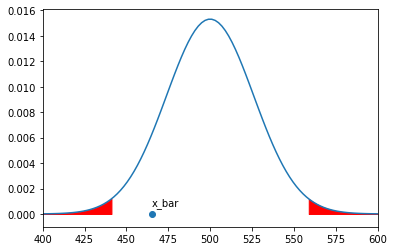

In [11]:

x_min = 400
x_max = 600

mean = pop_mean
sastd = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, sastd)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * sastd)
t_critical_right = pop_mean + (t_critical * sastd)


x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, sastd)
plt.fill_between(x1, y1, color='red')

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, sastd)
plt.fill_between(x2, y2, color='red')


plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


In [12]:
# inference by t test

if( t1 > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [13]:
#inference by  p value

p_value = 2 * (1.0 - norm.cdf(np.abs(t1)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18290982980044457
Fail to reject Null Hypothesis


## Inference : Fail to reject Null Hypothesis

### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? 

Step 1:

Alternate Hypothesis (Bold claim):

Null Hypothesis (Status Quo):
Step 2:

Collect the sample of size n=20 $ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $
Compute sample mean $ \bar{x}  = 4.25  $
Step 3:

Compute t-statistic

Step 4: Decide $ \alpha $ or significance level = 0.05

Step 5: right tailed t-test

In [14]:
l2 = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

sum(l2)/len(l2)

4.25

In [15]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4

In [16]:
df = len(l2) - 1
df

19

In [17]:
total =0
sample_std =0
for i in l2 :
    total+=(i - sample_mean)**2
sample_std = (total/(len(l2)-1))**0.5
print(round(sample_std,4))

0.8507


In [18]:
#tscore
t2 = t_score(sample_size, sample_mean, pop_mean, sample_std )

print(t2)

1.3142574813455419


In [19]:
# one tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


Text(4.25, 0.01, 'x_bar')

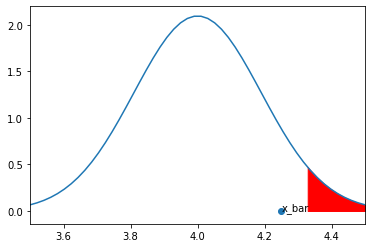

In [20]:

x_min = 3.5
x_max = 4.5

mean = pop_mean
sastd = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 50)
y = norm.pdf(x, mean, sastd)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * sastd)

x1 = np.linspace(t_critical_right, x_max, 50)
y1 = norm.pdf(x1, mean, sastd)
plt.fill_between(x1, y1, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.01))


In [21]:
#inference by t test

if( t2 > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [22]:
#inference by  p value

p_value = 2 * (1.0 - norm.cdf(np.abs(t2)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18875957054112558
Fail to reject Null Hypothesis


## Inference : Fail to reject Null Hypothesis

### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step 1:

Alternate Hypothesis (Bold claim):

Null Hypothesis (Status Quo):
Step 2:

Collect the sample of size n=10 $ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $
Compute sample mean $ \bar{x}  = 15.098  $
Step 3:

Compute t-statistic

Step 4: Decide $ \alpha $ or significance level = 0.05

Step 5: right tailed t-test:

In [23]:
l3 = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]

sum(l3)/len(l3)

15.098999999999998

In [24]:
sample_size = 20
sample_mean = 15.01
pop_mean = 15

In [25]:
df = len(l3) - 1
df

19

In [26]:
total =0
sample_std =0
for i in l3 :
    total+=(i - sample_mean)**2
sample_std = (total/(len(l3)-1))**0.5
print(round(sample_std,4))

1.0294


In [27]:
#tscore
t3 = t_score(sample_size, sample_mean, pop_mean, sample_std )

print(t3)

0.04344304871002149


In [28]:
# one tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


Text(15.01, 0.1, 'x_bar')

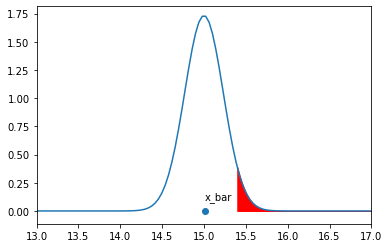

In [29]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [30]:
# inference by t test
if(t3 > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [31]:
#inference by  p test

p_value = 1.0 - norm.cdf(np.abs(t3))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.4826741810833277
Fail to reject Null Hypothesis


## Inference : Fail to reject null hypothesis

### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step 1:

Alternate Hypothesis (Bold claim):

Null Hypothesis (Status Quo):
Step 2:

Collect the sample of size n=100
Compute sample mean $ \bar{x}  = 97.5  $

Step 3:  Compute t-statistic

Step 4: Decide $ \alpha $ or significance level = 0.05

Step 5: left tailed t-test:

In [32]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
pop_std = 10
sample_std = 7

In [33]:
df = sample_size - 1
df

99

In [34]:
# tscore
t4 = t_score(sample_size, sample_mean, pop_mean, sample_std )

print(t4)

-3.5714285714285716


In [35]:
# one tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 99)

print(t_critical)

1.6603911559963895


Text(97.5, 0.02, 'x_bar')

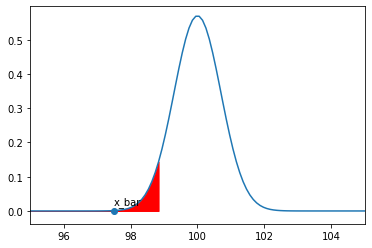

In [36]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [37]:
#inference by t test
if(t4 < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [38]:
#inference by p value
p_value = 1.0 - norm.cdf(np.abs(t4))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00017751969037349546
Reject Null Hypothesis


## Inference : Reject Null Hypothesis